# Лабораторная работа № 4

## 1. Содержание работы
3.1 Работа с табличными данными (библиотека Pandas)

3.2 Работа с изображениями (библиотека OpenCV)

## 2.Ход выполнения работы
### Часть 1 - Pandas

В рамках данной лабораторной работы студентам предлагается поработать с набором данных о преступности в Лос-Анджелесе (Crime Data from 2010 to 2019).

Результат работы должен быть в виде блокнота Jupyter Notebook. Все задачи в одном блокноте, например, pandas-da-ans.ipynb.

### Задание 1
- Сколько строк и столбцов в таблице?
- Каковы названия столбцов?
- Какие типы данных у столбцов?
- Сколько в каждом из них уникальных значений?
- Сколько пропущенных значений?
- Постройте распределения числовых переменных (гистограммы).

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Загрузка случайной выборки из набора данных
data = pd.read_excel('crime_data.xlsx', nrows=1000)

# Анализ данных
print("Количество строк и столбцов в таблице:", data.shape)
print("Названия столбцов:", data.columns)

# Типы данных у столбцов
print("Типы данных у столбцов:")
print(data.dtypes)

# Количество уникальных значений в каждом столбце
print("Количество уникальных значений в каждом столбце:")
print(data.nunique())

# Количество пропущенных значений
print("Количество пропущенных значений:")
print(data.isnull().sum())

# Построение гистограмм для числовых переменных
numerical_cols = data.select_dtypes(include=[np.number]).columns
for col in numerical_cols:
    plt.hist(data[col], bins=50)
    plt.title(col)
    plt.show()

Количество строк и столбцов в таблице: (50, 28)
Названия столбцов: Index(['DR_NO', 'Date_Rptd', 'DATE_OCC', 'TIME_OCC', 'AREA', 'AREA_NAME',
       'Rpt_Dist_No', 'Patr 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'Location', 'Cross Street', 'Lat',
       'LON'],
      dtype='object')
Типы данных у столбцов:
DR_NO               int64
Date_Rptd          object
DATE_OCC           object
TIME_OCC            int64
AREA                int64
AREA_NAME          object
Rpt_Dist_No         int64
Patr 1-2            int64
Crm Cd              int64
Crm Cd Desc        object
Mocodes           float64
Vict Age            int64
Vict Sex           object
Vict Descent       object
Premis Cd           int64
Premis Desc        object
Weapon Used Cd    float64
Weapon Desc        object
Status             object
Stat

KeyError: "[' Vict Age'] not in index"

### Задание 2
- В наборе данных имеется информация о Возрасте, Поле, и Происхождении каждой жертвы. Есть ли связь между этими признаками? Для этого рассчитайте коэффициент корреляции между парами этих переменных методами Numpy, Scipy или Pandas (на выбор).
- Дайте ответ на вопрос: верно ли, что женщины чаще оказываются жертвами по сравнению с мужчинами?

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Загрузка случайной выборки из набора данных
data = pd.read_excel('crime_data.xlsx', nrows = 1000)

le = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])
data['Race'] = le.fit_transform(data['Race'])

# Рассчет коэффициента корреляции между парами переменных
corr_matrix = data[['Age', 'Sex', 'Race']].corr()

print("Коэффициент корреляции между парами переменных:")
print(corr_matrix)

# Рассчет количества мужчин и женщин среди жертв
male_victims = data[data['Sex'] == 0].shape[0]
female_victims = data[data['Sex'] == 1].shape[0]

print("Количество мужчин среди жертв:", male_victims)
print("Количество женщин среди жертв:", female_victims)

if female_victims > male_victims:
    print("Да, женщины чаще оказываются жертвами по сравнению с мужчинами.")
else:
    print("Нет, женщины не чаще оказываются жертвами по сравнению с мужчинами.")

Коэффициент корреляции между парами переменных:
           Age       Sex      Race
Age   1.000000 -0.133158 -0.103324
Sex  -0.133158  1.000000  0.368514
Race -0.103324  0.368514  1.000000
Количество мужчин среди жертв: 33
Количество женщин среди жертв: 14
Нет, женщины не чаще оказываются жертвами по сравнению с мужчинами.


### Задание 3
- Изучите распределение количества преступлений по возрасту. Какова тенденция? Люди какого возраста чаще всего подвергаются преступлениям? Есть ли локальные минимумы? Используйте типы графиков hist (matplotlib и pandas) и density.
- Как различается вероятность женщин и мужчин стать жертвой в зависимости от возраста? Постройте визуализацию. В каком возрастном промежутке мужчины чаще становятся жетрвами преступлений?
- Определите 10 самых распространенных преступлений в Лос-Анджелесе. Постройте график (barchart или piechart).
- От каких преступлений чаще страдают женщины, а от каких мужчины?

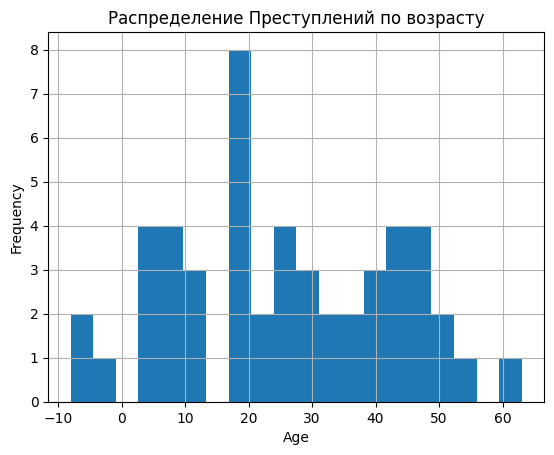

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Загрузка случайной выборки из набора данных
data = pd.read_excel('crime_data.xlsx', nrows = 1000)

data['Age'].hist(bins=20)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Распределение Преступлений по возрасту')
plt.show()


### Задание 4

Race
H    21
B     8
W     6
O     4
X     3
A     3
K     3
Z     1
C     1
Name: count, dtype: int64


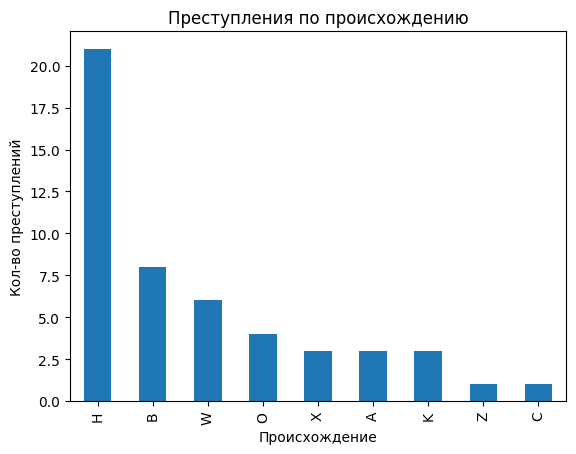

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Загрузка случайной выборки из набора данных
data = pd.read_excel('crime_data.xlsx', nrows = 1000)

origin_counts = data['Race'].value_counts()
print(origin_counts)

origin_counts.plot(kind='bar')
plt.xlabel('Происхождение')
plt.ylabel('Кол-во преступлений')
plt.title('Преступления по происхождению')
plt.show()

### Задание 5

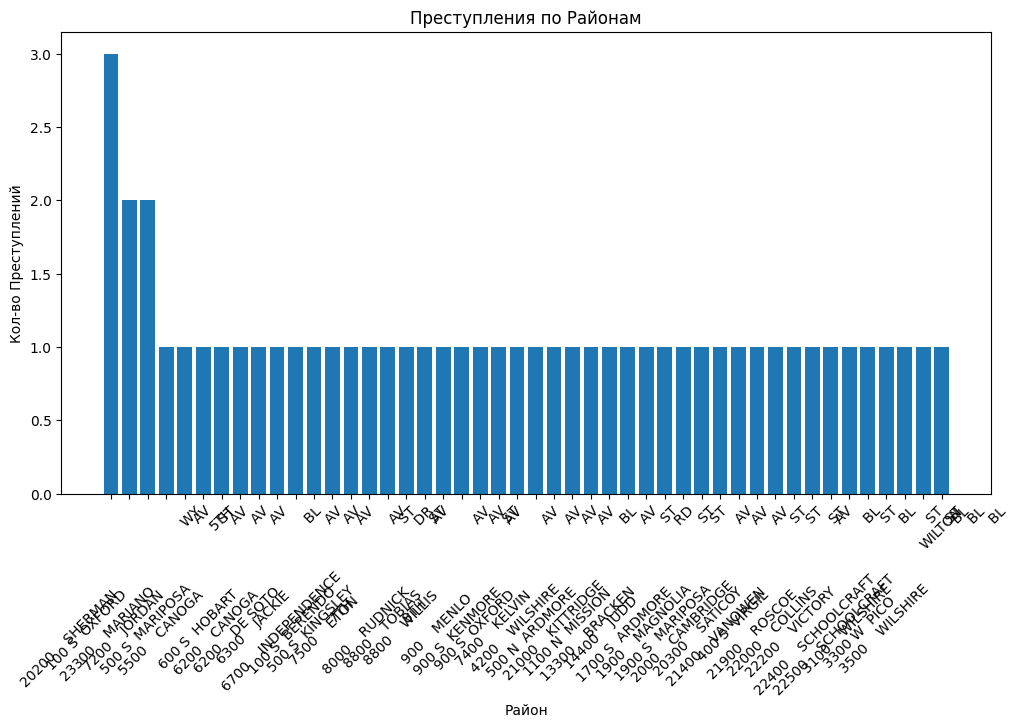

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Загрузка случайной выборки из набора данных
data = pd.read_excel('crime_data.xlsx', nrows = 1000)

# Sort the districts by the number of crimes
district_counts = data.groupby('Location')['Crm Cd'].count()
sorted_districts = district_counts.sort_values(ascending=False)

# Create a bar chart showing the most and least safe districts
plt.figure(figsize=(12, 6))
plt.bar(sorted_districts.index, sorted_districts.values)
plt.xlabel('Район')
plt.ylabel('Кол-во Преступлений')
plt.title('Преступления по Районам')
plt.xticks(rotation=45)
plt.show()

### Задание 6

Реализуйте средствами Python выполнение следующей задачи: «Дано изображение в формате jpg. Замените правую половину изображения левой, отражённой по горизонтали. Выполните инверсию (негатив) правой (изменённой) части изображения. Сохраните изображение в файл под новым именем».
Примечание. Задачу «отзеркаливания» можно свести к следующему: пусть имеем n столбцов матрицы (n – необязательно чётное). Необходимо заменить столбец n на столбец 0, n-1 на 1, n-2 на 2 и т.д.  до n/2 с округлением (функция ceil).
Примечание 2. Каждый пиксель изображения в градация серого описывается числом от 0 (чёрный) до 255 (белый). Инвертирование цвета изображения можно осуществить, вычитая из 255 значение яркости текущего пикселя.

In [1]:
import cv2
import numpy as np

# Открываем изображение
img = cv2.imread('image.jpg')

# Получаем размеры изображения
height, width, _ = img.shape

# Создаем матрицу для отраженной правой половины изображения
reflected_right_half = np.zeros((height, width // 2, 3), dtype=np.uint8)

# Отражаем правую половину изображения по горизонтали
for i in range(width // 2):
    reflected_right_half[:, i, :] = img[:, width - i - 1, :]

# Инвертируем правую половину изображения
inverted_right_half = 255 - reflected_right_half

# Создаем новое изображение, где правая половина заменена отраженной и инвертированной
new_img = np.zeros((height, width, 3), dtype=np.uint8)
new_img[:, :width // 2, :] = img[:, :width // 2, :]
new_img[:, width // 2:, :] = inverted_right_half

# сохраяем новое изображение
cv2.imwrite('output.jpg', new_img)

True

<img src="image.jpg" />

<img src="output.jpg" />